In [42]:
import numpy as np
from itertools import combinations
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
class player():
    """
    """
    def __init__(self,strategy,index):
        """
        """
        self.index = index
        self.strategy = strategy
        self.strategyhistory=[]
        if (self.strategy=='AlCo'):
            self.firstmove = 0
        else:
            self.firstmove = 1
        self.score = 0
    def calculatenextmove(self,lastoutcome):
        """
        params:
        --------
        lastoutcome: 2-tuple of ints
        Payoffs of the last game. 
        """
        self.nextmove = strategylogic(self.strategy,lastoutcome)
            
        
        
        
class game():
    """
    """
    def __init__(self,initialstrategies=[1,1,1,1,1,1],payoffmatrixdict={(0,0):(2,2),(0,1):(-1,3),(1,0):(3,-1),(1,1):(0,0)}):
        """
        Declare N Players, declare payoff matrix of game
        params
        --------
        initialstrategies: list of ints. Length number of strategies.
            number of each type of initial strategy in the following order:Alco Alch CCat Ckit Rand Simpl
        """
        self.players = [0]*sum(initialstrategies)
        for i in range(initialstrategies[0]):
            self.players[i] = player('AlCo',i)
        for i in range(initialstrategies[0],initialstrategies[0]+initialstrategies[1]):
            self.players[i] = player('AlCh',i)
        for i in range(initialstrategies[0]+initialstrategies[1],initialstrategies[0]+initialstrategies[1]+initialstrategies[2]):
            self.players[i] = player('CCat',i)
        for i in range(initialstrategies[0]+initialstrategies[1]+initialstrategies[2],initialstrategies[0]+initialstrategies[1]+initialstrategies[2]+initialstrategies[3]):
            self.players[i] = player('CKit',i)
        for i in range(initialstrategies[0]+initialstrategies[1]+initialstrategies[2]+initialstrategies[3],initialstrategies[0]+initialstrategies[1]+initialstrategies[2]+initialstrategies[3]+initialstrategies[4]):
            self.players[i] = player('Rand',i)
        for i in range(initialstrategies[0]+initialstrategies[1]+initialstrategies[2]+initialstrategies[3]+initialstrategies[4],initialstrategies[0]+initialstrategies[1]+initialstrategies[2]+initialstrategies[3]+initialstrategies[4]+initialstrategies[5]):
            self.players[i] = player('Simpl',i)
        self.payoffmatrixdict = payoffmatrixdict
    def step(self,ntimes=1,ncutoff=5,gamespermatch=5):
        """
            Play every played with every other player.
            Replacelosers
        Ntimes
        """
        for _ in range(ntimes):
            for (a,b) in list(combinations(range(len(self.players)),2)):
                 self.play(self.players[a],self.players[b],gamespermatch)

            self.replacelosers(ncutoff)
            self.resetscores()
        
    def replacelosers(self,ncutoff):
        """
    
     
        -Rank Players by score
        -Find ncutoff worst
        -Have them change their strategies to that of five best. Change their firstmove too.
        
        histories:
        Nplayers x Nsteps list of the strategies of each player.
        
        """
        for player in self.players:
            player.strategyhistory.append(player.strategy)
        self.players.sort(key=operator.attrgetter('score'))   #TURN INTO NP.SORT
        for i in range(1,ncutoff):
            self.players[-i].strategy = self.players[i].strategy
            self.players[-i].firstmove = self.players[i].firstmove#index a list into a numpy array
    def play(self,player1,player2,nturns=5):
        """
        """
        outcomeslist = []
        outcome = self.payoffmatrixdict[player1.firstmove,player2.firstmove]
        outcomeslist.append(outcome)
        backwardlist = [outcome[::-1]]
        player1.score += outcome[0]
        player2.score += outcome[1]
        for _ in range(nturns):
            player1.calculatenextmove(outcomeslist)
            player2.calculatenextmove(backwardlist)
            outcomeslist.append(outcome)
            backwardlist.append(outcome[::-1])
            outcome = self.payoffmatrixdict[player1.nextmove,player2.nextmove]
            player1.score += outcome[0]
            player2.score += outcome[1]
    def resetscores(self):
        """
        Sets all player scores to 0.
        This function exists because maybe one day I'll want a history of scores saved.
        """
        for player in self.players:
            player.score=0
    def draw_activity(self):
        """
        Plots the histories of the agents
        
        """
        self.histories = [player.strategyhistory for player in self.players]
        states = np.vstack(self.histories).T
        fig = plt.figure(figsize=(16, 8))
        plt.imshow(states, origin='upper',cmap='Greys',interpolation='None')


In [44]:
# def play(player1,player2, nturns=5):
#     """
#     Plays one prisoners dilemma match which consists of nturns steps
#     """
#     outcomeslist = []
#     outcome = self.payoffmatrixdict[player1.firstmove,player2.firstmove]
#     outcomeslist.append(outcome)
#     backwardlist = [outcome[::-1]]
#     player1.score += outcome[0]
#     player2.score += outcome[1]
#     for _ in range(nturns):
#         player1.calculatenextmove(outcomeslist)
#         player2.calculatenextmove(backwardlist)
#         outcomeslist.append(outcome)
#         backwardlist.append(outcome[::-1])
#         outcome = self.payoffmatrixdict[player1.nextmove,player2.nextmove]
#         player1.score +=x outcome[0]
#         player2.score += outcome[1]


In [45]:
def strategylogic(strategy,history):
    """
    strategy: String
        Choice of Strategy
    History: List of Tuples
    The list of all past outcomes

    """
    naught = {0:1,1:0}
    reversepayoffmatrixdict={(2,2):(0,0),(-1,3):(0,1),(3,-1):(1,0),(0,0):(1,1)}
    if (strategy== 'AlCo'):
        return 0
    elif (strategy== 'CCat'):
        return reversepayoffmatrixdict[history[-1]][1]
    elif (strategy== 'AlCh'):
        return 1
    elif (strategy== 'CKit'):
        if (len(history)<2):
            return 0
        elif (reversepayoffmatrixdict[history[-1]][1]==1 and reversepayoffmatrixdict[history[-2]][1]==1):
            return 1
        else:
            return 0
            
    elif (strategy== 'Rand'):
        return np.random.randint(2)
        
    elif (strategy== 'Simpl'):
        if (reversepayoffmatrixdict[history[-1]][1]==0):
            return reversepayoffmatrixdict[history[-1]][0]
        else:
            return naught[reversepayoffmatrixdict[history[-1]][0]]
#     elif (strategy== '')

Player1 Player 2
Cooperate or Defect?
(0,0) -> (2,2)
(0,1) -> (-1,3)
(1,0) -> (3,-1)
(1,1) -> (0,0)

In [53]:
apple = game([10,3,4,3,2,3])

In [54]:
apple.step(10,5,3)

ValueError: invalid literal for int() with base 10: 'AlCo'

In [48]:
apple.players.sort(key=operator.attrgetter('index'))

In [ ]:
for player in apple.players:
    print(player.strategyhistory)



TypeError: Image data can not convert to float

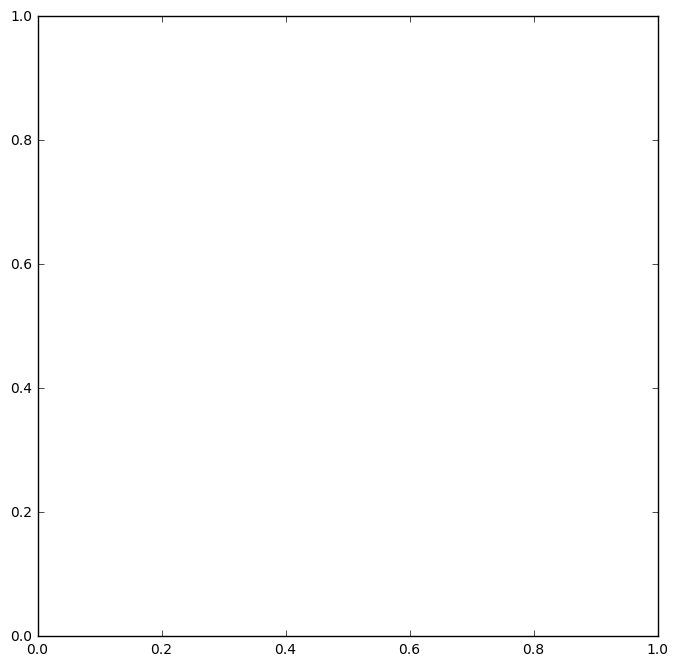

In [51]:
apple.draw_activity()

## TODO
-Add more strategies

-maybe do an RBN type plot in 6 colors?

-Find meaningful interaction of agents. maybe a chaotic phase? Maybe a computer can be made to do that?

-Add % to make mistake

-compare to Nicky's game

-Number of agents actually changing is less than the number I want. Look over that.

In [ ]:
plt.imshow(player.strategyhistory)


In [ ]:
for player in apple.players:
    print(player.strategyhistory)




In [12]:
a= np.array([1])

In [15]:
np.sort?


Signature: np.sort(a, axis=-1, kind='quicksort', order=None)
Docstring:
Return a sorted copy of an array.

Parameters
----------
a : array_like
    Array to be sorted.
axis : int or None, optional
    Axis along which to sort. If None, the array is flattened before
    sorting. The default is -1, which sorts along the last axis.
kind : {'quicksort', 'mergesort', 'heapsort'}, optional
    Sorting algorithm. Default is 'quicksort'.
order : str or list of str, optional
    When `a` is an array with fields defined, this argument specifies
    which fields to compare first, second, etc.  A single field can
    be specified as a string, and not all fields need be specified,
    but unspecified fields will still be used, in the order in which
    they come up in the dtype, to break ties.

Returns
-------
sorted_array : ndarray
    Array of the same type and shape as `a`.

See Also
--------
ndarray.sort : Method to sort an array in-place.
argsort : Indirect sort.
lexsort : Indirect stable sort

In [36]:
a=range(10)
a=np.array(a)

In [40]:
a[-1*np.arange(1,6)] = a[(np.arange(1,6)-1)]
%timeit

In [38]:
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])